In [1]:
# load libraries

import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt

from action_prediction import constants as const
from action_prediction.data import DataSet
from action_prediction import visualize as vis

%load_ext autoreload
%autoreload 2

In [173]:
# initialize dataset
data = DataSet(task='social_prediction')

# load behavior
df_behav = data.load_behav()

# load eyetracking
df_eye = data.load_eye(data_type='events')

# merge eye with behav
df_merged = data.merge_behav_eye(dataframe_behav=df_behav, dataframe_eye=df_eye)


In [204]:
df_merged.groupby(['type', 'actors', 'condition_name'])['type'].count().reset_index(name="count")

,type,actors,condition_name,count
0,blink,MK,easy,9
1,blink,MK,hard,8
2,blink,SB,easy,10
3,blink,SB,hard,11
4,fixations,MK,easy,97
5,fixations,MK,hard,100
6,fixations,SB,easy,98
7,fixations,SB,hard,92
8,saccade,MK,easy,34
9,saccade,MK,hard,32


In [59]:
# initialize plotting style
vis.plotting_style()

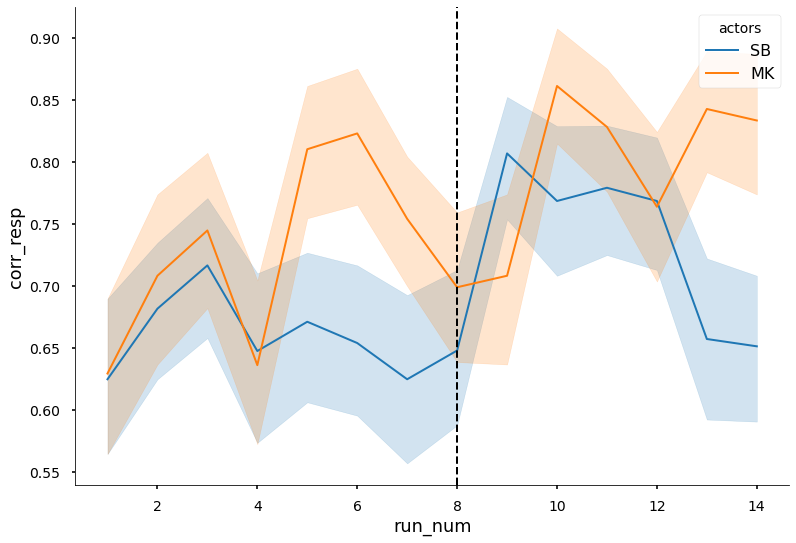

In [95]:
# visualize accuracy across runs
vis.plot_acc(dataframe=df_behav, hue='actors')

In [ ]:
# visualize rt across runs
vis.plot_rt(dataframe=df_behav, hue='condition_name')

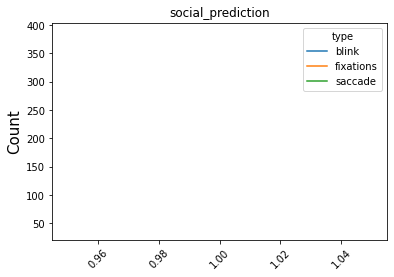

In [192]:
# plot fixation, saccade, blink count across runs
vis.plot_count_events(dataframe=df_merged)


In [37]:
# heatmap

# one subj, one run
for run in range(14):
    tmp = df_eye[(df_eye['subj']=='sIU') & (df_eye['run_num']==run+1) & (df_eye['type']=="fixations")]
    vis.plot_gaze_positions(dataframe=tmp)

#     vis.plot_heatmap(dataframe=tmp)
    plt.title(f'run{run+1}')